In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Admission_Predict.csv')
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
355,356,317,106,2,2.0,3.5,8.12,0,0
88,89,314,108,3,4.5,3.5,8.14,0,0
391,392,318,106,3,2.0,3.0,8.65,0,0
20,21,312,107,3,3.0,2.0,7.90,1,0
328,329,324,112,4,4.0,3.5,8.77,1,1


### Droping the Useless Columns

In [3]:
data.drop(columns='Serial No.', axis=1, inplace=True)
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
127,319,112,3,2.5,2.0,8.71,1,1
168,293,97,2,2.0,4.0,7.80,1,0
5,330,115,5,4.5,3.0,9.34,1,1
45,322,110,5,5.0,4.0,9.10,1,1
288,314,104,4,5.0,5.0,9.02,0,1


### Split into IV, DV and Scale Numeric Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


In [5]:
df_dv = data['Chance of Admit']
df_iv = data.drop(columns='Chance of Admit', axis=1)
df_iv.sample(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,324,105,3,3.0,4.0,8.75,0
247,311,104,2,2.5,3.5,8.48,0


In [6]:
type(df_dv)

pandas.core.series.Series

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sscaler = StandardScaler()

In [9]:
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 22.0 KB


In [10]:
df_iv['Research'] = df_iv['Research'].astype('object')
df_iv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 22.0+ KB


In [11]:
df_iv_numeric = df_iv.select_dtypes(include=np.number)
df_iv_categorical = df_iv.select_dtypes(exclude=np.number)

In [12]:
df_iv_numeric_scaled = sscaler.fit_transform(df_iv_numeric)
df_iv_numeric_scaled = pd.DataFrame(data=df_iv_numeric_scaled, columns=df_iv_numeric.columns)
df_iv_numeric_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029
...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036


In [13]:
df_iv_scaled = pd.concat([df_iv_numeric_scaled, df_iv_categorical], axis=1)
df_iv_scaled.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
81,2.023903,2.076899,0.798829,1.591075,1.724515,1.512959,1
29,-0.594059,-1.387349,-0.952029,-1.889402,-1.618648,-2.180973,0
64,0.714922,0.592221,-0.076600,-0.397769,0.052933,0.169711,0
53,0.627656,0.757186,0.798829,0.596653,-1.061454,-0.837725,1
210,0.714922,0.097329,0.798829,1.093864,0.610127,0.774173,1


In [14]:
df_iv_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float64
 1   TOEFL Score        400 non-null    float64
 2   University Rating  400 non-null    float64
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
dtypes: float64(6), object(1)
memory usage: 22.0+ KB


### Converting back IV Categorical Data into numeric
This shall ensure that there are not errors which computing VIF, Models etc

In [15]:
df_iv_scaled['Research'] = df_iv_scaled['Research'].astype(np.int64)
df_iv_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float64
 1   TOEFL Score        400 non-null    float64
 2   University Rating  400 non-null    float64
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 22.0 KB


### Checking for Multicollinearity of Data

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [17]:
df_vif = pd.DataFrame()
# Since variance_inflation_factor takes ndarray, inputs is passed as DataFrame.values instead of DataFrame
df_vif['VIF'] = [vif(exog=df_iv_scaled.values, exog_idx=i ) for i in range(df_iv_scaled.shape[1])]
df_vif['feature'] = df_iv_scaled.columns
df_vif.sort_values('VIF', ascending=False)

,VIF,feature
5,5.205309,CGPA
0,4.358514,GRE Score
1,4.282118,TOEFL Score
3,3.063188,SOP
2,2.918556,University Rating
4,2.430409,LOR
6,1.189484,Research


In [18]:
print(f'''The VIF for the first feature is \n{df_vif[df_vif['VIF']>5]} > 5.
So Multicollinearity exists but it should be fine since its just above 5.
So we will not drop any column''')

The VIF for the first feature is 
        VIF feature
5  5.205309    CGPA > 5.
So Multicollinearity exists but it should be fine since its just above 5.
So we will not drop any column


### Building the model using OLS

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Building using the OLS
import statsmodels.api as sm

In [21]:
df_iv_scaled_const = sm.add_constant(df_iv_scaled)

In [22]:
df_iv_scaled_const.sample(2)

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
235,1.0,0.802187,0.592221,1.674257,1.093864,0.610127,1.059613,1
143,1.0,2.023903,2.076899,0.798829,1.093864,0.610127,2.218165,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_iv_scaled_const, df_dv, test_size=0.2, random_state=10)

In [24]:
model_stat = sm.Logit(endog=y_train, exog=X_train).fit()
model_stat.summary()

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.6486
Time:                        04:43:16   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7119      0.330     -2.157      0.031      -1.359      -0.065
GRE Score             0.6095      0.447      1.365      0.172      -0.266       1.485
TOEFL Score           0.1989      0.403      0.493      0.622      -0.592       0.990
University Rating     0.5883      0.383      1.535      0.125      -0.163       1.339
SOP                   0.1768      0.374      0.473      0.636      -0.555       0.909
LOR                   0.5118      0.308      1.662      0.096      -0.092       1.115
CGPA                  2.6273      0.544      4.832      0.000       1.562       3.693
Research              0.5819      0.465      1.251      0.211      -0.329       1.493
=====================================================================================
"""

### Backward Elemination Strategy

In [25]:
X_train1 = X_train.copy()

while(len(X_train1.columns) > 0):
    model_stat = sm.Logit(endog=y_train, exog=X_train1).fit()
    f = model_stat.pvalues[1:].idxmax()
    print(f)
    if model_stat.pvalues[1:].max() > 0.05:
        X_train1 = X_train1.drop(f, axis=1)
    else:
        break
        
print(f'The final features through backward eliminations are: {X_train1.columns}')

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8
SOP
Optimization terminated successfully.
         Current function value: 0.241676
         Iterations 8
TOEFL Score
Optimization terminated successfully.
         Current function value: 0.242082
         Iterations 8
Research
Optimization terminated successfully.
         Current function value: 0.244507
         Iterations 8
University Rating
The final features through backward eliminations are: Index(['const', 'GRE Score', 'University Rating', 'LOR', 'CGPA'], dtype='object')


In [26]:
model_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                            4
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.6440
Time:                        04:43:16   Log-Likelihood:                -78.242
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 4.850e-60
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4097      0.208     -1.968      0.049      -0.818      -0.002
GRE Score             0.9266      0.380      2.438      0.015       0.182       1.671
University Rating     0.7219      0.347      2.078      0.038       0.041       1.403
LOR                   0.5593      0.266      2.100      0.036       0.037       1.081
CGPA                  2.6964      0.520      5.183      0.000       1.677       3.716
=====================================================================================
"""

In [27]:
model_stat.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.644     
Dependent Variable: Chance of Admit  AIC:              166.4843  
Date:               2021-10-18 04:43 BIC:              185.3259  
No. Observations:   320              Log-Likelihood:   -78.242   
Df Model:           4                LL-Null:          -219.78   
Df Residuals:       315              LLR p-value:      4.8502e-60
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.4097   0.2082 -1.9676 0.0491 -0.8178 -0.0016
GRE Score          0.9266   0.3801  2.4381 0.0148  0.1817  1.6715
University Rating  0.7219   0.3473  2.0784 0.0377  0.0411  1.4027
LOR                0.5593   0.2663  2.1003 0.0357  0.0374  1.0812
CGPA               2.6964   0.5203  5.1825 0.0000  1.6767  3.7162
=================================================================

"""

In [28]:
print('''
One unit increase in GRE Score, will increase the logit by 0.966 times, by keeping all the other inputs constant''')


One unit increase in GRE Score, will increase the logit by 0.966 times, by keeping all the other inputs constant


In [29]:
model_stat.params

const               -0.409713
GRE Score            0.926597
University Rating    0.721899
LOR                  0.559261
CGPA                 2.696416
dtype: float64

In [30]:
np.exp(model_stat.params)

const                 0.663841
GRE Score             2.525898
University Rating     2.058337
LOR                   1.749379
CGPA                 14.826494
dtype: float64

In [31]:
print('''
One unit increase in GRE Score, will increase the odd of getting admission by 2.526 times, by keeping all the other inputs constant
One unit increase in CGPA Score, will increase the odd of getting admission by 14.826 times, by keeping all the other inputs constant''')


One unit increase in GRE Score, will increase the odd of getting admission by 2.526 times, by keeping all the other inputs constant
One unit increase in CGPA Score, will increase the odd of getting admission by 14.826 times, by keeping all the other inputs constant


In [32]:
model_stat.pvalues[1:]

GRE Score            1.476580e-02
University Rating    3.767710e-02
LOR                  3.570475e-02
CGPA                 2.188791e-07
dtype: float64

### Building the model using sklearn

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model_logistic.predict(X_test)

In [36]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [37]:
# IF we want to understand the Probability values foreach of the prediction
model_logistic.predict_proba(X_test)

array([[9.33980319e-01, 6.60196807e-02],
       [2.05016563e-01, 7.94983437e-01],
       [9.78363353e-01, 2.16366472e-02],
       [9.98745909e-01, 1.25409079e-03],
       [9.97096908e-01, 2.90309160e-03],
       [9.50318740e-01, 4.96812601e-02],
       [1.21617181e-03, 9.98783828e-01],
       [3.55456813e-03, 9.96445432e-01],
       [5.83694729e-03, 9.94163053e-01],
       [7.59486785e-01, 2.40513215e-01],
       [1.19920537e-01, 8.80079463e-01],
       [2.61414895e-02, 9.73858511e-01],
       [6.01569344e-01, 3.98430656e-01],
       [9.94889613e-01, 5.11038674e-03],
       [1.00051667e-03, 9.98999483e-01],
       [3.17371297e-03, 9.96826287e-01],
       [9.99212509e-01, 7.87490536e-04],
       [1.55103420e-01, 8.44896580e-01],
       [2.92324577e-02, 9.70767542e-01],
       [1.51821371e-01, 8.48178629e-01],
       [1.32907447e-03, 9.98670926e-01],
       [2.19673632e-01, 7.80326368e-01],
       [1.84933052e-01, 8.15066948e-01],
       [5.18152616e-01, 4.81847384e-01],
       [6.171914

In [38]:
np.round(model_logistic.predict_proba(X_test), 3)

array([[0.934, 0.066],
       [0.205, 0.795],
       [0.978, 0.022],
       [0.999, 0.001],
       [0.997, 0.003],
       [0.95 , 0.05 ],
       [0.001, 0.999],
       [0.004, 0.996],
       [0.006, 0.994],
       [0.759, 0.241],
       [0.12 , 0.88 ],
       [0.026, 0.974],
       [0.602, 0.398],
       [0.995, 0.005],
       [0.001, 0.999],
       [0.003, 0.997],
       [0.999, 0.001],
       [0.155, 0.845],
       [0.029, 0.971],
       [0.152, 0.848],
       [0.001, 0.999],
       [0.22 , 0.78 ],
       [0.185, 0.815],
       [0.518, 0.482],
       [0.617, 0.383],
       [0.693, 0.307],
       [0.982, 0.018],
       [0.002, 0.998],
       [0.976, 0.024],
       [0.551, 0.449],
       [0.084, 0.916],
       [0.744, 0.256],
       [0.39 , 0.61 ],
       [0.16 , 0.84 ],
       [0.976, 0.024],
       [0.02 , 0.98 ],
       [0.999, 0.001],
       [0.979, 0.021],
       [0.299, 0.701],
       [0.117, 0.883],
       [0.003, 0.997],
       [0.044, 0.956],
       [0.199, 0.801],
       [0.9

In [39]:
print('''
The predict Proba is giving an array of two values for each element.
[0.934, 0.066], [0.205, 0.795], ...
[Probability for 0 class, Probability for 1 class]
If Probability for 0 class > Probability for 1 class (based on threshold), then the output will be 0 in Predict()
''')


The predict Proba is giving an array of two values for each element.
[0.934, 0.066], [0.205, 0.795], ...
[Probability for 0 class, Probability for 1 class]
If Probability for 0 class > Probability for 1 class (based on threshold), then the output will be 0 in Predict()



### Metrics for Classfication Problems

In [40]:
from sklearn.metrics import confusion_matrix

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[34,  8],
       [ 5, 33]], dtype=int64)

<AxesSubplot:>

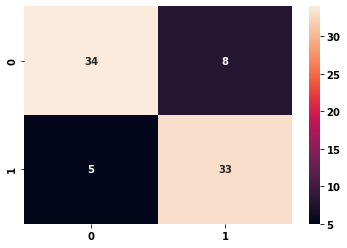

In [42]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True)

In [43]:
# In the above left hand side is Actual and Top is Prediction
# tp = 33
# tn = 34
# fp = 8
# fn = 5 

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
print(f'''
The confusion matrix is \n{cm}
where tp={tp}, tn={tn}, fp={fp} and fn={fn}''')


The confusion matrix is 
[[34  8]
 [ 5 33]]
where tp=33, tn=34, fp=8 and fn=5


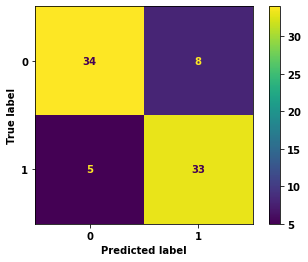

In [75]:
ConfusionMatrixDisplay(cm).plot()

In [44]:
acc = (tp+tn)/(tp+tn+fn+fp)
acc*100

83.75

In [45]:
rec = tp/(tp+fn)*100
rec

86.8421052631579

In [46]:
precis = tp/(tp+fp) * 100
precis

80.48780487804879

In [47]:
f1_sc = 2 * rec * precis / (rec+precis)
f1_sc

83.54430379746836

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.80      0.87      0.84        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [51]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8375

In [52]:
recall_score(y_true=y_test, y_pred=y_pred)

0.868421052631579

In [53]:
precision_score(y_true=y_test, y_pred=y_pred)

0.8048780487804879

In [54]:
f1_score(y_true=y_test, y_pred=y_pred)

0.8354430379746836

### ROC-AUC Curve

In [55]:
model_logistic.predict_proba(X_test)

array([[9.33980319e-01, 6.60196807e-02],
       [2.05016563e-01, 7.94983437e-01],
       [9.78363353e-01, 2.16366472e-02],
       [9.98745909e-01, 1.25409079e-03],
       [9.97096908e-01, 2.90309160e-03],
       [9.50318740e-01, 4.96812601e-02],
       [1.21617181e-03, 9.98783828e-01],
       [3.55456813e-03, 9.96445432e-01],
       [5.83694729e-03, 9.94163053e-01],
       [7.59486785e-01, 2.40513215e-01],
       [1.19920537e-01, 8.80079463e-01],
       [2.61414895e-02, 9.73858511e-01],
       [6.01569344e-01, 3.98430656e-01],
       [9.94889613e-01, 5.11038674e-03],
       [1.00051667e-03, 9.98999483e-01],
       [3.17371297e-03, 9.96826287e-01],
       [9.99212509e-01, 7.87490536e-04],
       [1.55103420e-01, 8.44896580e-01],
       [2.92324577e-02, 9.70767542e-01],
       [1.51821371e-01, 8.48178629e-01],
       [1.32907447e-03, 9.98670926e-01],
       [2.19673632e-01, 7.80326368e-01],
       [1.84933052e-01, 8.15066948e-01],
       [5.18152616e-01, 4.81847384e-01],
       [6.171914

In [56]:
prob = model_logistic.predict_proba(X_test)
prob_1 = prob[:, 1]
prob_1[:5]

array([0.06601968, 0.79498344, 0.02163665, 0.00125409, 0.00290309])

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
fpr, tpr, thresh = roc_curve(y_true=y_test, y_score=prob_1)

Text(0, 0.5, 'True positive rate --> Sensitivity')

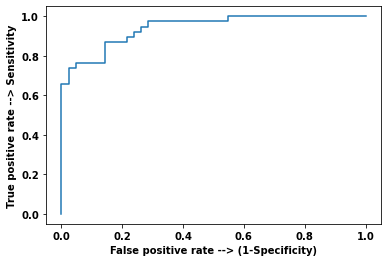

In [59]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate --> (1-Specificity)')
plt.ylabel('True positive rate --> Sensitivity')

In [60]:
roc_auc_score(y_true=y_test, y_score=prob_1)

0.9411027568922306

### Improving the model performance

In [61]:
from sklearn.metrics import cohen_kappa_score

In [62]:
df_th_comp_matrix = pd.DataFrame(columns=['Threshold Value', 'Accuracy',
                                      'Precision', 'Recall',
                                      'F1-Score', 'AUC-ROC',
                                      'Kappa'])

def compute_scores(threshold_value):
    y_pred_prob = model_logistic.predict_proba(X_test)
    y_pred_prob_1 = y_pred_prob[:, 1]
    y_pred = [1 if val > threshold_value else 0 for val in y_pred_prob_1]
    global df_th_comp_matrix
    df_th_comp_matrix = df_th_comp_matrix.append({
            'Threshold Value': threshold_value, 
            'Accuracy': accuracy_score(y_true=y_test, y_pred=y_pred),
            'Precision': precision_score(y_true=y_test, y_pred=y_pred), 
            'Recall': recall_score(y_true=y_test, y_pred=y_pred), 
            'F1-Score': f1_score(y_true=y_test, y_pred=y_pred), 
            'AUC-ROC': roc_auc_score(y_true=y_test, y_score=y_pred),
            'Kappa': cohen_kappa_score(y1=y_test, y2=y_pred)
    }, ignore_index=True)


In [63]:
# Checking for different threshold values
th_values = np.arange(0.1, 1, 0.1)
print(th_values)
for val in th_values:
    compute_scores(val)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [64]:
df_th_comp_matrix

,Threshold Value,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Kappa
0,0.1,0.7375,0.649123,0.973684,0.778947,0.748747,0.485924
1,0.2,0.8125,0.725490,0.973684,0.831461,0.820175,0.630086
2,0.3,0.8250,0.750000,0.947368,0.837209,0.830827,0.653465
3,0.4,0.8250,0.772727,0.894737,0.829268,0.828321,0.651741
4,0.5,0.8375,0.804878,0.868421,0.835443,0.838972,0.675406
5,0.6,0.8625,0.846154,0.868421,0.857143,0.862782,0.724656
6,0.7,0.8250,0.833333,0.789474,0.810811,0.823308,0.648241
7,0.8,0.8375,0.878788,0.763158,0.816901,0.833960,0.672131
8,0.9,0.8250,1.000000,0.631579,0.774194,0.815789,0.642857


In [65]:
df_th_comp_matrix.style.highlight_max(color='yellow')

,Threshold Value,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Kappa
0,0.100000,0.737500,0.649123,0.973684,0.778947,0.748747,0.485924
1,0.200000,0.812500,0.725490,0.973684,0.831461,0.820175,0.630086
2,0.300000,0.825000,0.750000,0.947368,0.837209,0.830827,0.653465
3,0.400000,0.825000,0.772727,0.894737,0.829268,0.828321,0.651741
4,0.500000,0.837500,0.804878,0.868421,0.835443,0.838972,0.675406
5,0.600000,0.862500,0.846154,0.868421,0.857143,0.862782,0.724656
6,0.700000,0.825000,0.833333,0.789474,0.810811,0.823308,0.648241
7,0.800000,0.837500,0.878788,0.763158,0.816901,0.833960,0.672131
8,0.900000,0.825000,1.000000,0.631579,0.774194,0.815789,0.642857


In [67]:
prob = model_logistic.predict_proba(X_test)
prob_1 = prob[:, 1]
fpr, trp, thres = roc_curve(y_true=y_test, y_score=prob_1)

In [68]:
table = pd.DataFrame({
    'TPR': tpr,
    'FPR': fpr,
    'Threshold': thres
})
table

,TPR,FPR,Threshold
0,0.000000,0.000000,1.998999
1,0.026316,0.000000,0.998999
2,0.657895,0.000000,0.883056
3,0.657895,0.023810,0.880079
4,0.736842,0.023810,0.848179
5,0.736842,0.047619,0.844897
6,0.763158,0.047619,0.840415
7,0.763158,0.142857,0.780326
8,0.868421,0.142857,0.609775
9,0.868421,0.214286,0.481847


In [69]:
table['Difference'] = table['TPR']-table['FPR']

In [70]:
# This is called as Youden's Index
table.sort_values(by='Difference', ascending=False)

,TPR,FPR,Threshold,Difference
8,0.868421,0.142857,0.609775,0.725564
6,0.763158,0.047619,0.840415,0.715539
4,0.736842,0.023810,0.848179,0.713033
5,0.736842,0.047619,0.844897,0.689223
16,0.973684,0.285714,0.255797,0.687970
14,0.947368,0.261905,0.373436,0.685464
12,0.921053,0.238095,0.398431,0.682957
10,0.894737,0.214286,0.474521,0.680451
15,0.947368,0.285714,0.307266,0.661654
13,0.921053,0.261905,0.382809,0.659148
